In [162]:
import xarray as xr
import numpy as np
import pandas as pd

In [163]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [164]:
ds = xr.open_dataset('annual_avg_output.nc')

In [165]:
ds.pr_pre.data.shape

(165, 162)

In [166]:
tas_1 = ds.tas_pre.data[:,0] 

In [167]:
import matplotlib.pyplot as plt

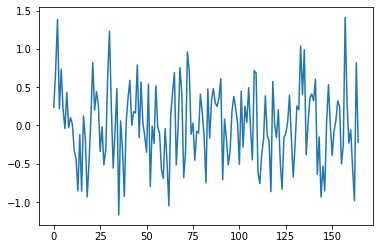

In [168]:
plt.plot(tas_1)
plt.show()

In [169]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

In [224]:
smoothed_tas = moving_average(tas_1, 20)

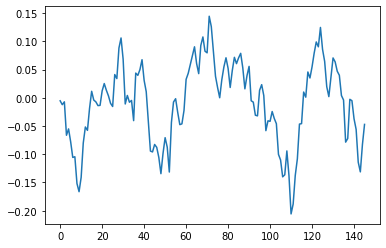

In [225]:
plt.plot(smoothed_tas)

In [226]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

In [227]:
dataset = smoothed_tas.astype('float32')

In [228]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

In [229]:
# reshape into X=t and Y=t+1
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [230]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [231]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=300, batch_size=4, verbose=1)

Epoch 1/300
22/22 [==============================] - 1s 1ms/step - loss: 0.0048
Epoch 2/300
22/22 [==============================] - 0s 1ms/step - loss: 0.0043
Epoch 3/300
22/22 [==============================] - 0s 1ms/step - loss: 0.0039
Epoch 4/300
22/22 [==============================] - 0s 1ms/step - loss: 0.0035
Epoch 5/300
22/22 [==============================] - 0s 1ms/step - loss: 0.0033
Epoch 6/300
22/22 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 7/300
22/22 [==============================] - 0s 1ms/step - loss: 0.0028
Epoch 8/300
22/22 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 9/300
22/22 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 10/300
22/22 [==============================] - 0s 1ms/step - loss: 0.0024
Epoch 11/300
22/22 [==============================] - 0s 1ms/step - loss: 0.0023
Epoch 12/300
22/22 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 13/300
22/22 [=================

22/22 [==============================] - 0s 1ms/step - loss: 9.1103e-04
Epoch 101/300
22/22 [==============================] - 0s 1ms/step - loss: 9.2702e-04
Epoch 102/300
22/22 [==============================] - 0s 1ms/step - loss: 9.1273e-04
Epoch 103/300
22/22 [==============================] - 0s 1ms/step - loss: 9.1972e-04
Epoch 104/300
22/22 [==============================] - 0s 1ms/step - loss: 9.0353e-04
Epoch 105/300
22/22 [==============================] - 0s 1ms/step - loss: 9.1426e-04
Epoch 106/300
22/22 [==============================] - 0s 1ms/step - loss: 9.0004e-04
Epoch 107/300
22/22 [==============================] - 0s 1ms/step - loss: 9.1456e-04
Epoch 108/300
22/22 [==============================] - 0s 1ms/step - loss: 9.1100e-04
Epoch 109/300
22/22 [==============================] - 0s 1ms/step - loss: 9.0351e-04
Epoch 110/300
22/22 [==============================] - 0s 1ms/step - loss: 9.0504e-04
Epoch 111/300
22/22 [==============================] - 0s 1ms/step -

22/22 [==============================] - 0s 1ms/step - loss: 8.3245e-04
Epoch 196/300
22/22 [==============================] - 0s 1ms/step - loss: 8.1964e-04
Epoch 197/300
22/22 [==============================] - 0s 1ms/step - loss: 8.2910e-04
Epoch 198/300
22/22 [==============================] - 0s 1ms/step - loss: 8.2877e-04
Epoch 199/300
22/22 [==============================] - 0s 1ms/step - loss: 8.2708e-04
Epoch 200/300
22/22 [==============================] - 0s 1ms/step - loss: 8.2112e-04
Epoch 201/300
22/22 [==============================] - 0s 1ms/step - loss: 8.3120e-04
Epoch 202/300
22/22 [==============================] - 0s 1ms/step - loss: 8.5774e-04
Epoch 203/300
22/22 [==============================] - 0s 1ms/step - loss: 8.2623e-04
Epoch 204/300
22/22 [==============================] - 0s 1ms/step - loss: 8.2180e-04
Epoch 205/300
22/22 [==============================] - 0s 1ms/step - loss: 8.3170e-04
Epoch 206/300
22/22 [==============================] - 0s 1ms/step -

22/22 [==============================] - 0s 1ms/step - loss: 8.0701e-04
Epoch 291/300
22/22 [==============================] - 0s 1ms/step - loss: 8.0261e-04
Epoch 292/300
22/22 [==============================] - 0s 1ms/step - loss: 8.1768e-04
Epoch 293/300
22/22 [==============================] - 0s 1ms/step - loss: 8.1066e-04
Epoch 294/300
22/22 [==============================] - 0s 1ms/step - loss: 7.9917e-04
Epoch 295/300
22/22 [==============================] - 0s 1ms/step - loss: 8.0822e-04
Epoch 296/300
22/22 [==============================] - 0s 1ms/step - loss: 7.9817e-04
Epoch 297/300
22/22 [==============================] - 0s 1ms/step - loss: 7.9968e-04
Epoch 298/300
22/22 [==============================] - 0s 1ms/step - loss: 8.0438e-04
Epoch 299/300
22/22 [==============================] - 0s 1ms/step - loss: 7.9192e-04
Epoch 300/300
22/22 [==============================] - 0s 1ms/step - loss: 7.9106e-04


In [232]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

2/2 [==============================] - 0s 2ms/step


In [233]:
trainPredict.shape

(86, 1)

In [234]:
import math
from sklearn.metrics import mean_squared_error

In [235]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.03 RMSE
Test Score: 0.04 RMSE


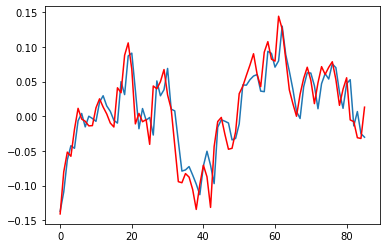

In [236]:
plt.plot(trainPredict)
plt.plot(trainY, color='red')

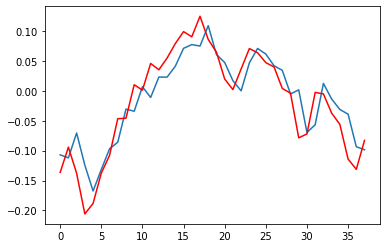

In [237]:
plt.plot(testPredict)
plt.plot(testY, color='red')